In [5]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

In [12]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/")
!ls
import os
os.chdir("/content/drive/My Drive/[ Masters ] - Deep Learning Proj/")
!pip install import_ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'My Drive'


In [7]:
import os
import sys
import tensorflow as tf
import numpy as np
IntialiseEnv()
import import_ipynb
import pickle
import matplotlib.pyplot as plt

## Use GPU/ CPU Configuration 
Tensorflow version 2.0
Prompt to user if CPU/ GPU is in use with device name

In [8]:
# Use GPU/CPU Configurations

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.3.0
/device:GPU:0
Num GPUs Available:  1


### Retrieve Predictions

In [16]:
def ReadTestDataSet():
    processedTestDataSet = '/content/drive/My Drive/[ Masters ] - Deep Learning Proj/DataSet/Processed_DataSet/GermanTestDataSet.pkl'
    isProcessedTestDataSetExits= os.path.exists(processedTestDataSet)
    test_image_array, test_image_labels = None, None
    
    if isProcessedTestDataSetExits:
        print("Loading Processed Test DataSet from Processed_DataSet/GermanTestDataSet.pkl")
        file = open(processedTestDataSet, 'rb')
        test_image_array, test_image_labels = pickle.load(file)
        file.close()
        print("Done Loading Test DataSet.")
    else:
        print("Processed_DataSet/TestDataSet.pkl file does not exist")
    return test_image_array, test_image_labels

In [17]:
def GetPredictions():
    test_image_array, test_image_labels= ReadTestDataSet()
    model = tf.keras.models.load_model('/content/drive/My Drive/[ Masters ] - Deep Learning Proj/Model/Trained_Models/German_Winning_99_75.h5')
    model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])
    predictions= model.predict(test_image_array)
    del model
    return predictions, test_image_labels

In [18]:
predictions, test_image_labels=GetPredictions()

Loading Processed Test DataSet from Processed_DataSet/GermanTestDataSet.pkl
Done Loading Test DataSet.


## Subsets classes
7 subsets with their corresponding classes respectively

In [19]:
def GetSubSetsAccuracy():
    # Classes are divided into 7 Subsets
    
    Blue=[ 33, 34, 35, 36, 37, 38, 39, 40 ]
    Danger=[ 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31 ]
    End_of=[ 6, 32, 41, 42 ]
    Red_Round=[ 0, 1, 2, 4,5, 8, 10, 15, 16 ]
    Red_Other=[ 9, 10, 15, 16 ]
    Speed=[ 0, 1, 2, 3, 4, 5,7, 8 ]
    Spezial=[ 12, 13, 14, 17 ]
    
    Total_Blue_count=0
    Total_Danger_count=0
    Total_End_Of_count=0
    Total_Red_Round_count=0
    Total_Red_Other_count=0
    Total_Speed_count=0
    Total_Spezial_count=0
    Blue_Correct_count=0
    Danger_Correct_count=0
    End_Of_Correct_count=0
    Red_Round_Correct_count=0
    Red_Other_Correct_count=0
    Speed_Correct_count=0
    Spezial_Correct_count=0
    
    for prediction, test_label in zip(predictions, test_image_labels):
            
            prediction=np.argmax(prediction)

            if test_label in Blue:
                if prediction == test_label:
                    Blue_Correct_count+=1
                Total_Blue_count+=1

            if test_label in Danger:
                if prediction == test_label:
                    Danger_Correct_count+=1
                Total_Danger_count+=1

            if test_label in End_of:
                if prediction == test_label:
                    End_Of_Correct_count+=1
                Total_End_Of_count+=1

            if test_label in Red_Round:
                if prediction == test_label:
                    Red_Round_Correct_count+=1
                Total_Red_Round_count+=1

            if test_label in Red_Other:
                if prediction == test_label:
                    Red_Other_Correct_count+=1
                Total_Red_Other_count+=1

            if test_label in Speed:
                if prediction == test_label:
                    Speed_Correct_count+=1
                Total_Speed_count+=1

            if test_label in Spezial:
                if prediction == test_label:
                    Spezial_Correct_count+=1
                Total_Spezial_count+=1
                
    Accuracy_Blue= round(Blue_Correct_count/ Total_Blue_count *100, 2)
    Accuracy_Danger = round(Danger_Correct_count / Total_Danger_count *100, 2)
    Accuracy_End_Of= round(End_Of_Correct_count / Total_End_Of_count * 100, 2)
    Accuracy_Red_Round= round(Red_Round_Correct_count/ Total_Red_Round_count *100, 2)
    Accuracy_Red_Other= round(Red_Other_Correct_count/ Total_Red_Other_count*100, 2)
    Accuracy_Speed= round(Speed_Correct_count/ Total_Speed_count*100, 2)
    Accuracy_Spezial= round(Spezial_Correct_count/ Total_Spezial_count *100, 2)
    
    return Accuracy_Blue, Accuracy_Danger, Accuracy_End_Of,  Accuracy_Red_Round, Accuracy_Red_Other, Accuracy_Speed, Accuracy_Spezial

In [20]:
Accuracy_Blue, Accuracy_Danger, Accuracy_End_Of,  Accuracy_Red_Round, Accuracy_Red_Other, Accuracy_Speed, Accuracy_Spezial= GetSubSetsAccuracy()

In [21]:
print("Blue SubSet Accuracy: ", Accuracy_Blue)
print("Danger SubSet Accuracy: ", Accuracy_Danger)
print("End Of SubSet Accuracy: ", Accuracy_End_Of)
print("Red Round SubSet Accuracy: ", Accuracy_Red_Round)
print("Red Other SubSet Accuracy: ", Accuracy_Red_Other)
print("Speed SubSet Accuracy: ", Accuracy_Speed)
print("Spezial SubSet Accuracy: ", Accuracy_Spezial)

Blue SubSet Accuracy:  99.89
Danger SubSet Accuracy:  99.78
End Of SubSet Accuracy:  99.17
Red Round SubSet Accuracy:  99.72
Red Other SubSet Accuracy:  99.93
Speed SubSet Accuracy:  99.57
Spezial SubSet Accuracy:  99.9


In [22]:
Blue={"Ours": Accuracy_Blue,"STDNN": 99.77, "MCDNN": 99.89, "COSFIRE": 99.83, "INI": 99.72, "SERMANET": 97.18, "CAOR": 99.27}
Danger={"Ours": Accuracy_Danger,"STDNN": 99.64, "MCDNN": 99.07, "COSFIRE": 97.96, "INI": 98.67, "SERMANET": 98.03, "CAOR": 92.08}
EndOf={"Ours": Accuracy_End_Of,"STDNN": 98.89, "MCDNN": 99.72, "COSFIRE": 94.17, "INI": 98.89, "SERMANET": 94.44, "CAOR": 87.50}
RedRound={"Ours": Accuracy_Red_Round,"STDNN": 99.86, "MCDNN": 99.74, "COSFIRE": 99.58, "INI": 98.00, "SERMANET": 99.21, "CAOR": 97.16}
RedOther={"Ours": Accuracy_Red_Other,"STDNN": 99.87, "MCDNN": 99.93, "COSFIRE": 99.93, "INI": 99.93, "SERMANET": 99.87, "CAOR": 99.13}
Speed={"Ours": Accuracy_Speed,"STDNN": 99.69, "MCDNN": 99.47, "COSFIRE": 99.09, "INI": 97.63, "SERMANET": 98.61, "CAOR": 95.95}
Spezial={"Ours": Accuracy_Spezial,"STDNN": 99.80, "MCDNN": 99.22, "COSFIRE": 99.51, "INI": 100.0, "SERMANET": 98.63, "CAOR": 98.73}

In [25]:
Ours=[Blue["Ours"], Danger["Ours"], EndOf["Ours"], RedRound["Ours"], RedOther["Ours"], Speed["Ours"], Spezial["Ours"]]
STDNN=[Blue["STDNN"], Danger["STDNN"], EndOf["STDNN"], RedRound["STDNN"], RedOther["STDNN"], Speed["STDNN"], Spezial["STDNN"]]
MCDNN=[Blue["MCDNN"], Danger["MCDNN"], EndOf["MCDNN"], RedRound["MCDNN"], RedOther["MCDNN"], Speed["MCDNN"], Spezial["MCDNN"]]

In [27]:
def DisplayHistogram():
    width= 0.25
    x_labels=["Blue", "Danger","EndOf", "Red \n Round","Red \n Other","Speed","Spezial"]
    X = np.arange(7)
    fig, ax = plt.subplots()
    ax.bar(X , Ours, color = 'r', label="RIECNN", width = width)
    ax.bar(X + width, STDNN, color = 'b', label="STDNN", width = width)
    ax.bar(X + width*2, MCDNN, color = 'y', label="MCDNN", width = width)

    ax.set_ylim(98.8, 100.5)
    ax.set_ylabel('Accuracy in % ')
    ax.set_xticks(X + width)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('German Traffic Sign Recognition SubSets')
    ax.set_title('SubSets Accuracy for Top-performing approaches')
    ax.legend()

    
    fig.savefig('SubSet_Histogram.png', bbox_inches='tight', dpi=150)
    plt.show()

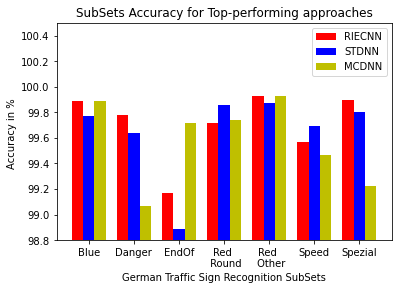

In [28]:
DisplayHistogram()